# Decision tree/voting classifiers assignment

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
loans = pd.read_csv('datasets/loan_data.csv')

**Check out the info(), head(), and describe() methods on loans.**

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

(your visualization does not have to be exactly the same as below)

Hint: you can create two overlapping histogram with alpha equals .5

In [77]:
loans_cleaned = loans.copy()
loans_cleaned.rename(columns={'credit.policy': 'creditpolicy', 'not.fully.paid': 'notfullypaid'}, inplace=True)

In [78]:
loans_cleaned.head()

,creditpolicy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,notfullypaid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

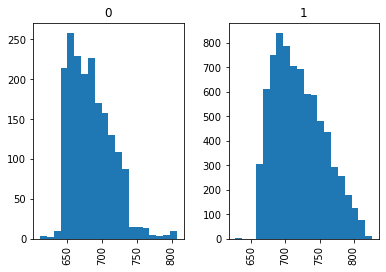

In [58]:
loans_cleaned.fico.hist(bins=20,by=loans_cleaned['creditpolicy'])

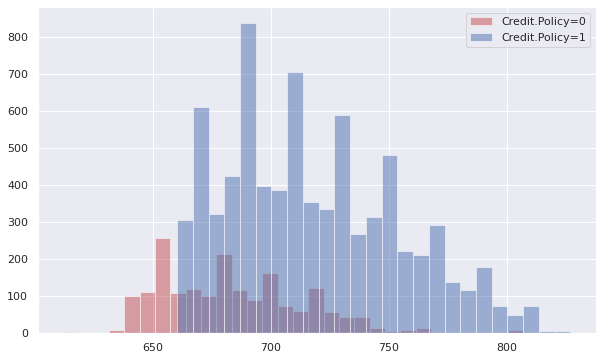

In [87]:
sns.set()
plt.figure(figsize=(10,6))

x1 = loans_cleaned.loc[loans_cleaned.creditpolicy == 0, 'fico']
x2 = loans_cleaned.loc[loans_cleaned.creditpolicy == 1, 'fico']

kwargs = dict(alpha=0.5, bins=30)

plt.hist(x1, **kwargs, color='r', label='Credit.Policy=0')
plt.hist(x2, **kwargs, color='b', label='Credit.Policy=1')
plt.legend();

Text(0.5, 0, 'FICO')

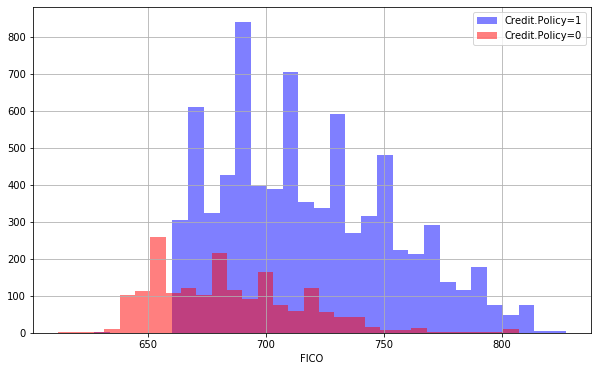

In [6]:
#Example Result

**Create a similar figure, except this time select by the not.fully.paid column.**

(your visualization does not have to be exactly the same as below)

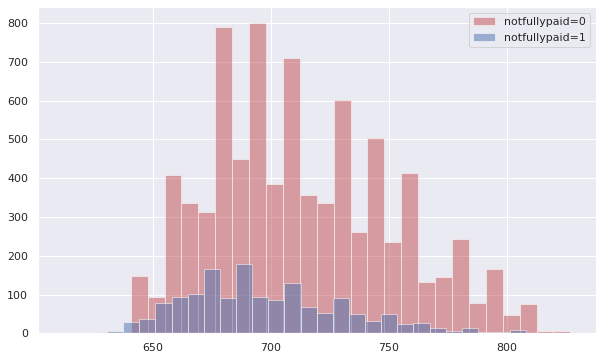

In [86]:
import seaborn as sns
sns.set()

plt.figure(figsize=(10,6))

x1 = loans_cleaned.loc[loans_cleaned.notfullypaid == 0, 'fico']
x2 = loans_cleaned.loc[loans_cleaned.notfullypaid == 1, 'fico']

kwargs = dict(alpha=0.5, bins=30)

plt.hist(x1, **kwargs, color='r', label='notfullypaid=0')
plt.hist(x2, **kwargs, color='b', label='notfullypaid=1')
plt.legend();

Text(0.5, 0, 'FICO')

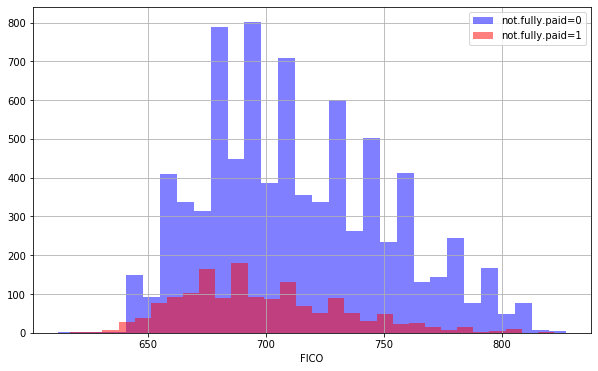

In [7]:
#Example Result

**Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.**

(your visualization does not have to be exactly the same as below)

Hint: x='purpose',hue='not.fully.paid'

In [88]:
loans_cleaned.head()

,creditpolicy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,notfullypaid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


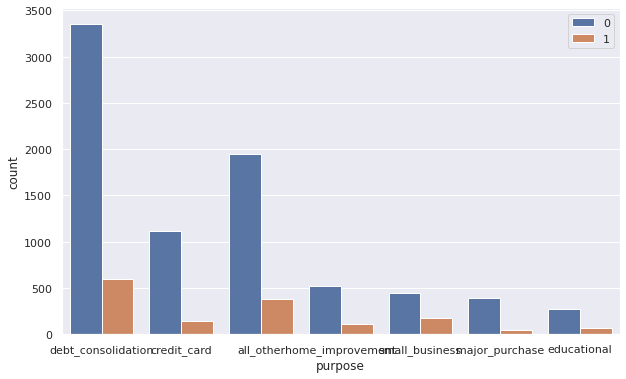

In [90]:
sns.set()

plt.figure(figsize=(10,6))

sns.countplot(x ='purpose', data = loans_cleaned, hue="notfullypaid")
plt.legend()
plt.show()

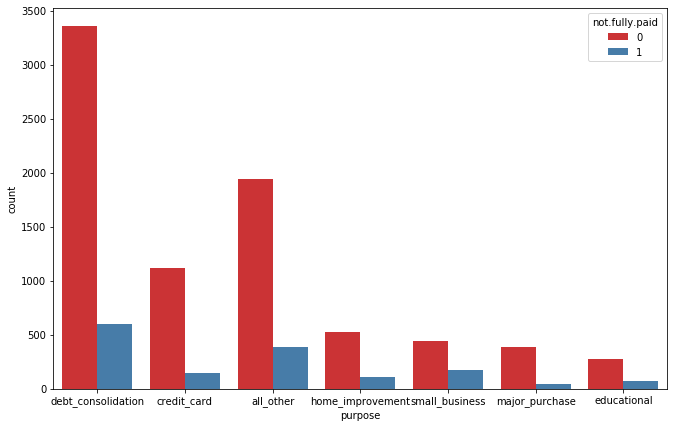

In [8]:
#Example Result

**Let's see the trend between FICO score and interest rate. Create the following jointplot.**

(your visualization does not have to be exactly the same as below)

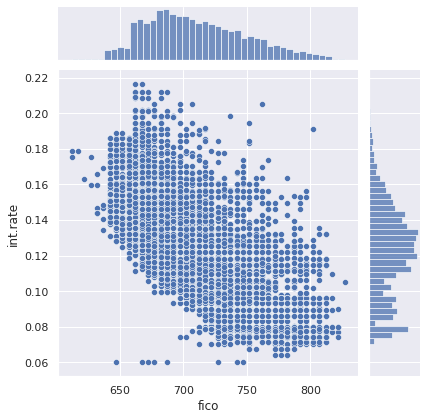

In [91]:
sns.jointplot(data=loans_cleaned, x='fico', y='int.rate')

**Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

(your visualization does not have to be exactly the same as below)

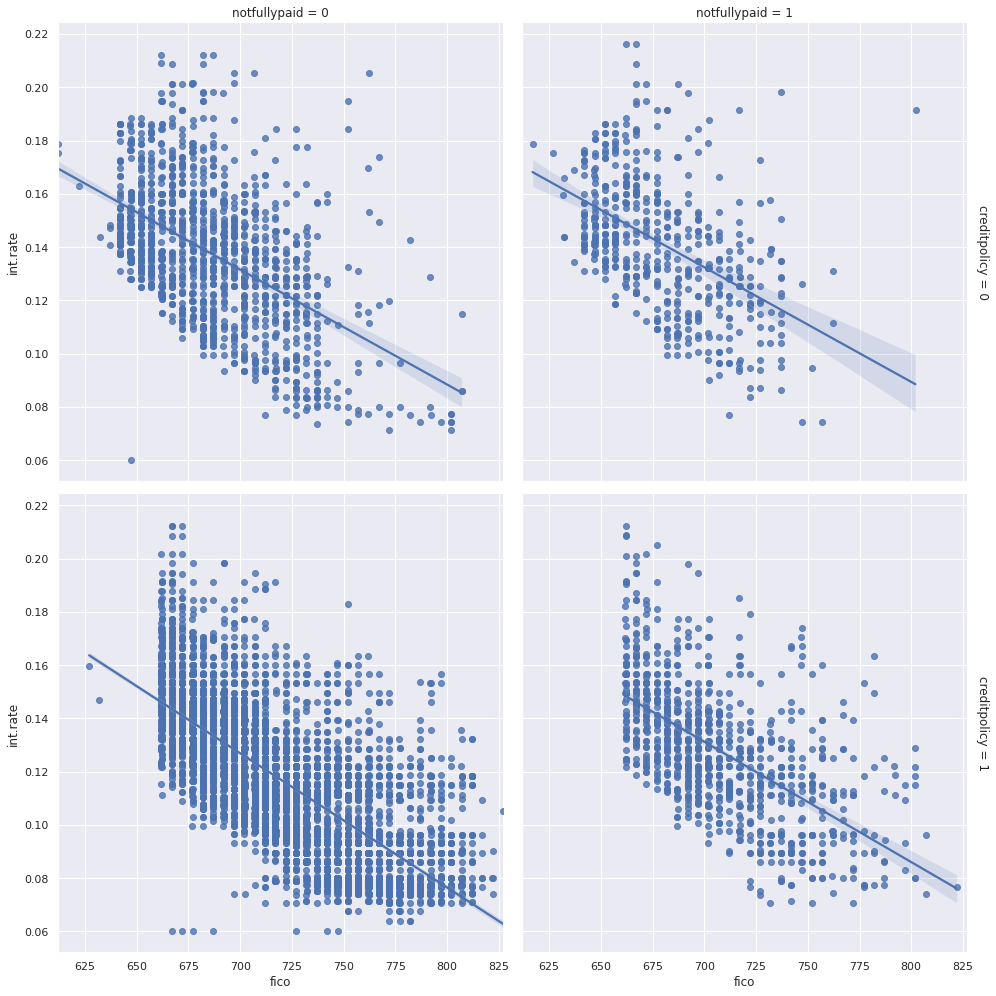

In [115]:
g = sns.FacetGrid(loans_cleaned, row="creditpolicy", col="notfullypaid", margin_titles=True, height= 7)
g.map(sns.regplot, "fico", "int.rate", fit_reg=True, x_jitter=.1)

<Figure size 792x504 with 0 Axes>

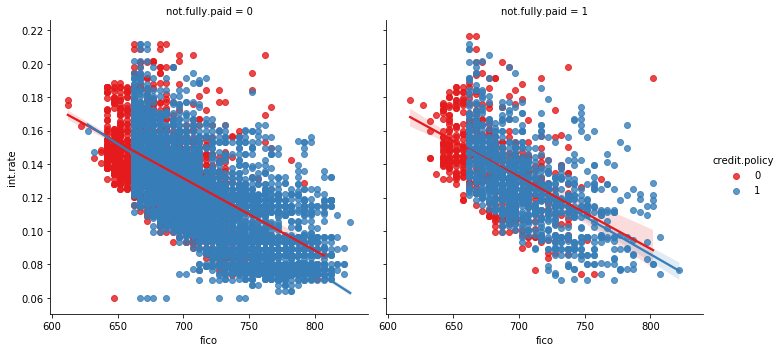

In [12]:
#Example Result

### What are your observations about this dataset, especially, is this a beautiful dataset? If we are building decision tree models on the dataset, what do we need to pay attention to? 

<font color='red'> based on the analysis I've done above, it looks like there is a huge disproportion in number of loans for loans that are not fully paid. I think we would want this to be balanced when we're doing a decision tree.</font>

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [116]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [76]:
cat_feats =['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [6]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [7]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [8]:
# check the info() again to make sure the categorical feature is gone
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split

Now its time to split our data into a training set and a testing set!

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**
Keep 30% for the testing purpose. Use random state 101.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

**Import DecisionTreeClassifier**

In [12]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.** Do not specify and parameter when building the decision tree in this step.

In [13]:
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [15]:
predictions = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.73      0.74      2874



In [18]:
print(confusion_matrix(y_test,predictions))

[[2004  427]
 [ 336  107]]


### Improving the decision tree model

We just created a tree with no regularization, and the performance of the tree model was not impressive. Can you try to add one (or several) regularization when you create the tree model to improve the performance of the decision tree? Please read the documentation of sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Below are some parameter you may consider to regularize to control the "growth" of the tree (you can also consider other parameters, too):
- max_depth 
- min_samples_split
- min_samples_leaf 
- min_impurity_decrease 

Try different regularization parameters (or combination of them) and show the classification report of the best you have found.  

In [35]:
dtree1 = DecisionTreeClassifier(min_samples_leaf=12,max_depth=35, splitter="best")
dtree1.fit(X_train,y_train)
predictions = dtree1.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2431
           1       0.30      0.05      0.09       443

    accuracy                           0.83      2874
   macro avg       0.57      0.52      0.50      2874
weighted avg       0.76      0.83      0.78      2874



In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

## Voting classifier model

Now let's create two groups of classifiers:

- Create decision tree models with max_depth equals 5, 6, 7, 8, 9.

Build a voting classifier with those models and make prediction with the same testing dataset.

To reduce the duplicated code, consider to create functions below:

In [37]:
def create_and_train_dt(d):
    """
    Creates a decision tree model with max_depth as d.
    Train the model with X_train and y_train.
    Return the decision tree model.
    """
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,y_train)
    return dt

In [39]:
create_and_train_dt(1)

DecisionTreeClassifier(max_depth=1)

In [41]:
# Create a list of decision tree models
dt_models = []

for d in [ 5, 6, 7, 8, 9]:
    model = create_and_train_dt(d)
    dt_models.append(model)

In [42]:
# print the list of decision tree models. 
dt_models

[DecisionTreeClassifier(max_depth=5),
 DecisionTreeClassifier(max_depth=6),
 DecisionTreeClassifier(max_depth=7),
 DecisionTreeClassifier(max_depth=8),
 DecisionTreeClassifier(max_depth=9)]

In [31]:
#Example Result

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=5, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=6, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=7, max_features=None, max_leaf_n

In [57]:
# Create another list of model names for the decision tree models we just created
dt_names = []
for d in [5, 6, 7, 8,9]:
    names = 'dt_depth='
    number = str(d)
    finalname = names+number
    dt_names.append(finalname)

In [58]:
# check the names of our decision tree models
dt_names

['dt_depth=5', 'dt_depth=6', 'dt_depth=7', 'dt_depth=8', 'dt_depth=9']

In [59]:
# Zip the decision tree models and their names together, now we should have a list of tuples
list(zip(dt_names,dt_models))

[('dt_depth=5', DecisionTreeClassifier(max_depth=5)),
 ('dt_depth=6', DecisionTreeClassifier(max_depth=6)),
 ('dt_depth=7', DecisionTreeClassifier(max_depth=7)),
 ('dt_depth=8', DecisionTreeClassifier(max_depth=8)),
 ('dt_depth=9', DecisionTreeClassifier(max_depth=9))]

In [34]:
#Example Results

[('dt_depth=5',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=5, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=42, splitter='best')),
 ('dt_depth=6',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=6, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=42, splitter='best')),
 ('dt_depth=7',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
   

In [60]:
# Create a voting classifier with the decision tree models we just created
voting_clf = VotingClassifier(
    estimators=list(zip(dt_names,dt_models)),flatten_transform=True, n_jobs=None, voting='hard',
                 weights=None)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt_depth=5',
                              DecisionTreeClassifier(max_depth=5)),
                             ('dt_depth=6',
                              DecisionTreeClassifier(max_depth=6)),
                             ('dt_depth=7',
                              DecisionTreeClassifier(max_depth=7)),
                             ('dt_depth=8',
                              DecisionTreeClassifier(max_depth=8)),
                             ('dt_depth=9',
                              DecisionTreeClassifier(max_depth=9))])

In [35]:
#Example Results

VotingClassifier(estimators=[('dt_depth=5',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=5,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=42,


## Predictions and Evaluation


In [64]:
# Make a prediction with the voting classifier model
# It is okay if your result is not exactly the same.
y_pred = voting_clf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2431
           1       0.25      0.04      0.07       443

    accuracy                           0.83      2874
   macro avg       0.55      0.51      0.49      2874
weighted avg       0.76      0.83      0.78      2874

[[2376   55]
 [ 425   18]]


In [36]:
#Example Results

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2431
           1       0.25      0.04      0.07       443

    accuracy                           0.83      2874
   macro avg       0.55      0.51      0.49      2874
weighted avg       0.76      0.83      0.78      2874



### You may find this voting classifier's performance is very close to a single decision tree classifier. Can you explain the reason? Why this voting classifier is bad?


<font color='red'> This data set is unbalanced. We can see this as a result of the confusion matrix showing a large number of incorrect predictions on the bottom left corner.</font>

# Adaboost

One of the problem we have learned about this loan dataset is that it's imbalanced. Let's fix this first.

First check the samples with 'not.fully.paid' as 0 and 1. Then try to keep ~20% of the samples with 'not.fully.paid' as 0, so that we have roughly the same number of samples for both classes.

In [68]:
loans_0 = loans.loc[loans['not.fully.paid'] == 0]
loans_0.size

112630

In [69]:
loans_1 = loans.loc[loans['not.fully.paid'] == 1]
loans_1.size

21462

In [70]:
loans_0_under_sample = loans_0.sample(frac=0.2, random_state=7)
loans_0_under_sample.size

22526

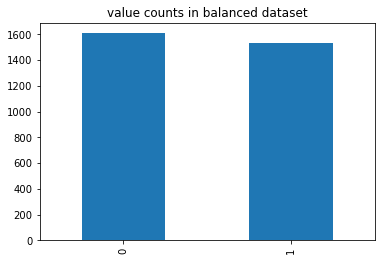

In [74]:
# Concatenate the loans_0_under_sample and loans_1, show the number of samples in those two classes
loans_balance = pd.concat([loans_0_under_sample, loans_1])
loans_balance['not.fully.paid'].value_counts().plot(kind='bar', title='value counts in balanced dataset');

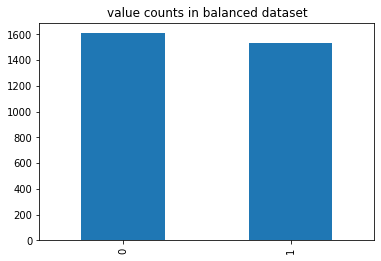

In [40]:
#Example Code

## Apply one-hot encoder, then do another train-test split with test portion as 30%.

In [75]:
loans_balance.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1857,1,all_other,0.1158,39.62,10.915088,24.37,697,8700.000000,22723,76.9,2,0,1,0
873,1,debt_consolidation,0.1134,213.85,10.839581,20.82,722,8700.000000,23119,50.6,3,0,1,0
9290,0,debt_consolidation,0.1704,535.12,11.407565,20.44,662,6060.958333,8086,68.9,5,0,0,0
2574,1,credit_card,0.0932,351.42,11.095398,19.15,747,3749.958333,4148,14.3,2,0,0,0
552,1,small_business,0.0800,313.37,10.126631,12.14,802,7890.041667,1467,9.2,0,0,0,0


In [77]:
loans_balance = pd.get_dummies(loans_balance, columns=cat_feats,drop_first=True)
X = loans_balance.drop('not.fully.paid',axis=1)
y = loans_balance['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Create one Adaboost classifier with learning_rate as 0.15 and n_estimators 50.

In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ada_clf = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.15)
ada_clf.fit(X_train, y_train)
predictions = ada_clf.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67       502
           1       0.61      0.51      0.55       441

    accuracy                           0.62       943
   macro avg       0.62      0.61      0.61       943
weighted avg       0.62      0.62      0.62       943

[[362 140]
 [218 223]]
0.6203605514316013


In [42]:
#Example Results

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       502
           1       0.63      0.54      0.58       441

    accuracy                           0.64       943
   macro avg       0.63      0.63      0.63       943
weighted avg       0.63      0.64      0.63       943

[[360 142]
 [202 239]]
0.6352067868504772


### use learning_rate 0.15, try different n_estimators between 50 and 500, plot the changes of accuracy.

In [81]:
# Create a range of the number of estimators we want to try
n_estimators = list(range(50,501,50))
n_estimators

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

In [ ]:
# Create a function which takes a list integers as n_estimators, and a learning_rate, then return the accuracy of
# Adaboost classifiers for each n_estimator on the same learning_rate
# for each tree model, use random_state=42
def accuracies_on_Ada(list_estimators, my_learning_rate):
    accuracy_scores = []
    for current_n in n_estimators:
        ada_clf = AdaBoostClassifier(
        n_estimators=current_n,
        learning_rate=my_learning_rate)
        ada_clf.fit(X_train, y_train)
        predictions = ada_clf.predict(X_test)
        scores =  accuracy_score(y_test, predictions)
        accuracy_scores.append(scores)
    return accuracy_scores

# Get the accuracies for learning rate as 0.15, for n_estimator from 50 to 500
accuracy_scores_15 = accuracies_on_Ada(n_estimators, 0.15)
accuracy_scores_15

In [44]:
#Example Result

[0.6203605514316013,
 0.6320254506892895,
 0.6383881230116649,
 0.6489925768822906,
 0.6468716861081655,
 0.6436903499469777,
 0.6489925768822906,
 0.6458112407211029,
 0.6405090137857901,
 0.6426299045599152]

<module 'matplotlib.pyplot' from '/home/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

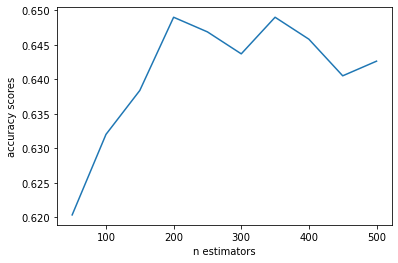

In [91]:
plt.plot(n_estimators,accuracy_scores_15)
plt.xlabel("n estimators")
plt.ylabel("accuracy scores")
plt

Text(0.5, 1.0, 'Adaboost performance: learning_rate=0.15 n_estimators vs accuracy')

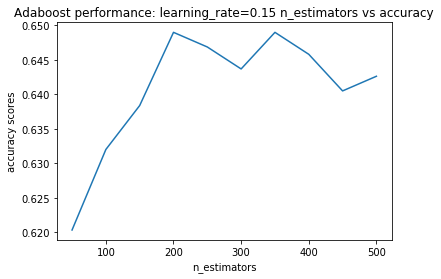

In [45]:
#Example Result

### Try higher learning rates: 0.3 and 0.5, make another plot with 3 lines showing the changes on accuracy for learning rate 0.15, 0.3 and 0.5.

In [92]:
accuracy_scores_30 = accuracies_on_Ada(n_estimators, 0.3)
accuracy_scores_50 = accuracies_on_Ada(n_estimators, 0.5)
accuracy_scores_nested = []
accuracy_scores_nested.append(accuracy_scores_15)
accuracy_scores_nested.append(accuracy_scores_30)
accuracy_scores_nested.append(accuracy_scores_50)

<module 'matplotlib.pyplot' from '/home/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

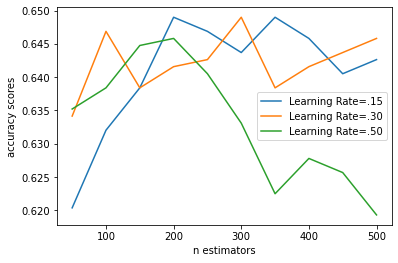

In [102]:
plt.plot(n_estimators,accuracy_scores_15, label= "Learning Rate=.15")
plt.plot(n_estimators,accuracy_scores_30, label= "Learning Rate=.30")
plt.plot(n_estimators,accuracy_scores_50, label= "Learning Rate=.50")
plt.xlabel("n estimators")
plt.ylabel("accuracy scores")
plt.legend()
plt

Text(0, 0.5, 'accuracy')

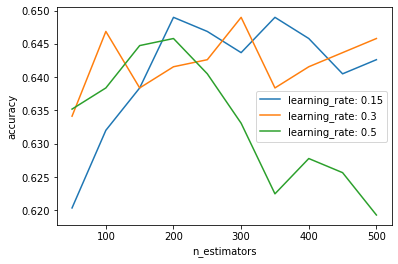

In [47]:
#Example Result

### Compare the growth of accuracy for different learning rates, explain the trade-off between learning_rate and n_estimators.



<font color='red'>like other parameters in building a mode, we look to find the sweet spot for best mixture of learning rate and estimator. Based on the chart above, a small learning rate paired with a small n_estimators value results in poor accuracy. The smaller the learning rate the more estimators we need for better accuracy. This is demonstrated on the chart where the blue line starts with a small accuracy but improves over time. The opposite goes for a large learning rate. We can see that the 50% learning rate declines severely in accuracy with bigger estimators. We see that the 30% learning rate starts high and improves with bigger estimators, for the most part.  </font>

### Does a high learning rate always outperform a low learning rate? Why or why not?


<font color='red'> No, not always. The chart above demonstrates this perfectly. The largest learning rate we had was outperformed by the smallest learning rate.</font>

# Great, you have finished!




Remember we learned different projections last semester? Here is an interesting gif:

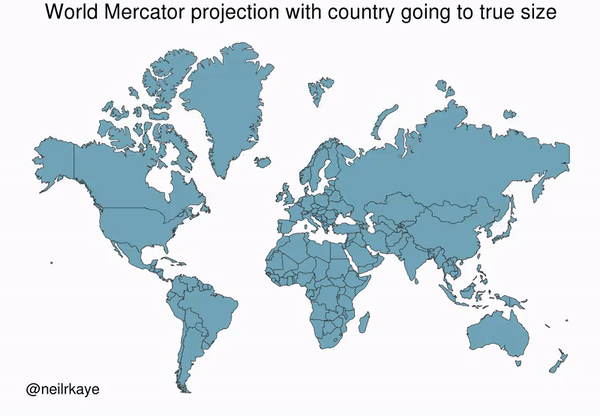

... So, where is Antarctica? =(